>### Regretion
 analysis and predecting | USA_cars_datasets[1].csv |

In [1]:
# IMPORT LIBS
#============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

>### read data , Drop unnecessary columns , add  m/y to columns data

In [170]:
data1 = pd.read_csv( 'USA_cars_datasets[1].csv')

# Columns I could not work with
#==============================
data1.drop(columns = ['Unnamed: 0', 'vin', 'lot', 'country']  , inplace=True)

# added m/y to columns data1
#===========================
data1['m/y']=data1['mileage']/data1['year']
data1

,price,brand,model,year,title_status,mileage,color,state,condition,m/y
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left,136.512450
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days left,94.754848
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days left,19.618434
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours left,31.850050
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours left,3.297324
...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,1 days left,11.693413
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,21 hours left,17.122398
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,21 hours left,15.656095
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,2 days left,16.133300


In [174]:
#datadata1['condition'].value_counts()

data1['time_value']= data1['condition'] .str.split(' ').str[0]
data1['time_obj']= data1['condition'] .str.split(' ').str[1]
data1


,price,brand,model,year,title_status,mileage,color,state,condition,m/y,time_value,time_obj
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left,136.512450,10,days
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days left,94.754848,6,days
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days left,19.618434,2,days
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours left,31.850050,22,hours
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours left,3.297324,22,hours
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,1 days left,11.693413,1,days
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,21 hours left,17.122398,21,hours
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,21 hours left,15.656095,21,hours
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,2 days left,16.133300,2,days


># first information
>#### unique values  and dtypes
>>#### There are differences between data unique values on features mileage , brand , model 
>#### Statistical summary of data1
>>#### Years are from 1973 to 2020 | Average Price of a car= $18767


In [3]:
#Different dtype 
# unique values defferences
#==========================
print( data1.nunique() , data1.dtypes )

price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
state             44
condition         47
m/y             2471
dtype: int64 price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
state            object
condition        object
m/y             float64
dtype: object


In [4]:
data1.describe()

,price,year,mileage,m/y
count,2499.000000,2499.000000,2.499000e+03,2499.000000
mean,18767.671469,2016.714286,5.229869e+04,25.962845
std,12116.094936,3.442656,5.970552e+04,29.713887
min,0.000000,1973.000000,0.000000e+00,0.000000
25%,10200.000000,2016.000000,2.146650e+04,10.634871
50%,16900.000000,2018.000000,3.536500e+04,17.529237
75%,25555.500000,2019.000000,6.347250e+04,31.507824
max,84900.000000,2020.000000,1.017936e+06,506.435821


>###  string_features and  integer_features

In [5]:
# string_features or integer_features
#====================================

string_features=[feature for feature in data1.columns if data1[feature].dtype=='object']
intger_features=[feature for feature in data1.columns if data1[feature].dtype!='object']

>### plot intger_features ['price', 'year', 'mileage', 'm/y']

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

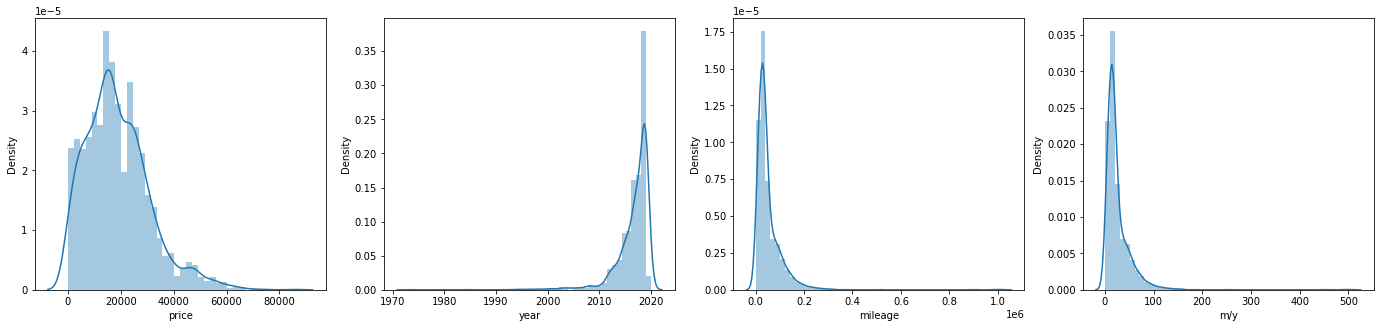

In [6]:
# plot 
#=====
fig, axes = plt.subplots( 1,4 , figsize=(24, 5))
int_f_plot = [sns.distplot(data1[n], ax=axes[i]) for i , n in enumerate (intger_features)]

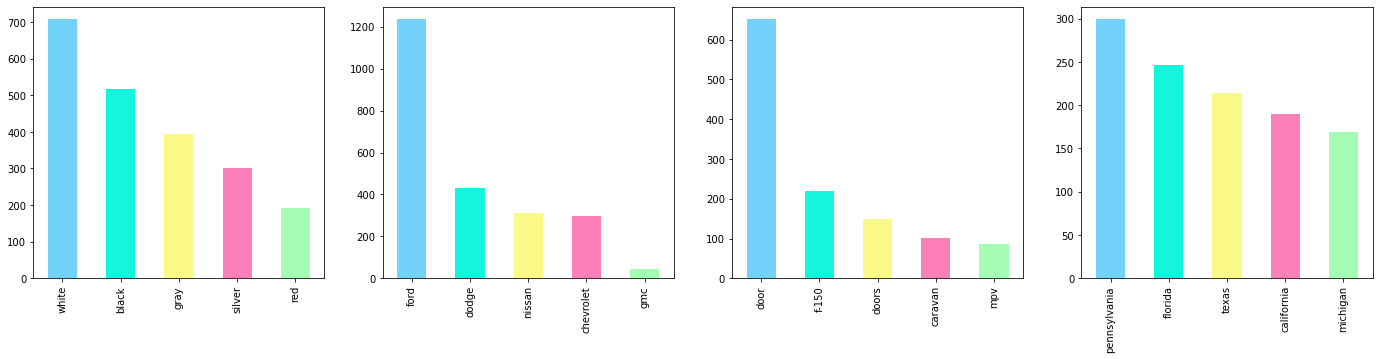

In [7]:
# string features values - plot
#==============================
color = data1['color'].value_counts()
brand = data1['brand'].value_counts()
model = data1['model'].value_counts()
state = data1['state'].value_counts()

fig , axes = plt.subplots(1,4, figsize=(24, 5))
list_a = [color ,brand , model , state]
for i , c in enumerate(list_a):
    pd.Series(c).head(5).plot(kind= 'bar' ,  ax=axes[i] , color=['#72d2f9','#14f5dd','#fbfa88','#fb80ba','#a5fcb3'])

| feature | result                                                     |
|-------  |------------------------------------------------------------|                                
| color  |   white followed by black are most faverit color cars in US |
| brand  | ' Ford' followed by dodge are most popular cars in US       |
| model  |  'door' is  most popular cars model in US                   |    
| state  |   pennsylvani                                                |

>### Correlation | heatmap Correlation and  Triangle Correlation Heatmap

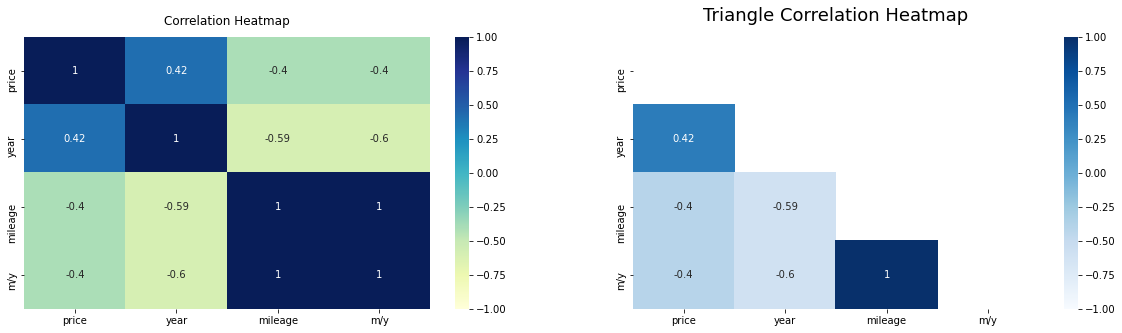

In [17]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))

#heatmap corrolation
import seaborn as sns
heatmap = sns.heatmap(data1.corr(), ax=axes[0] , vmin=-1, vmax=1, annot=True ,cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap' , fontdict={'fontsize':12}, pad=12);

# triangle corrolation
mask = np.triu(np.ones_like(data1.corr(), dtype=np.bool))
heatmap = sns.heatmap(data1.corr(),  vmin=-1, vmax=1, mask =mask , annot=True, cmap="Blues")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

>#### 1) Brand - Price .mean() Visualization
>#### 2) Model - Price .mean() Visualization
>#### 3) Year - Price .mean() Visualization
>#### 4) Color - Price .mean() Visualization
>#### 5) State - Price .mean() Visualization



[<AxesSubplot:xlabel='brand'>, <AxesSubplot:xlabel='color'>]

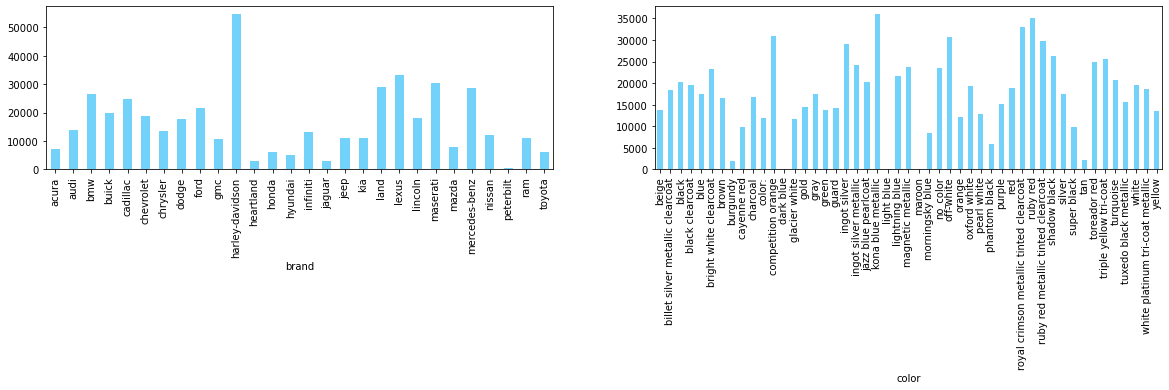

In [32]:
fig, axes = plt.subplots(1,2, figsize=(20, 3))
list_a=['brand', 'color' ]
[data1.groupby([c]).price.mean().plot(kind='bar' ,color='#72d2f9',  ax=axes[i])  for i, c in enumerate (list_a)]
# fontsize ?????????

<AxesSubplot:xlabel='model'>

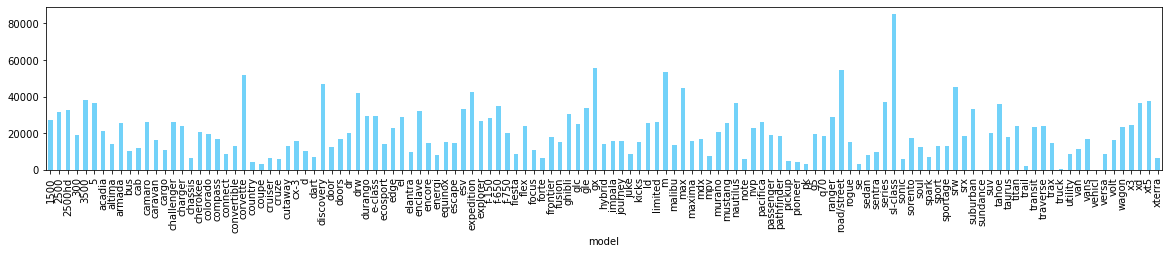

In [38]:
fig, axes = plt.subplots( figsize=(20, 3))
data1.groupby(['model']).price.mean().plot(kind='bar' ,color='#72d2f9' )

-----------------------------------------------------------------------------------------------------------------------

In [41]:
# string_features or integer_features

string_features=[feature for feature in data1.columns if data1[feature].dtype=='object']
intger_features=[feature for feature in data1.columns if data1[feature].dtype!='object']

In [42]:
data1["brand"] = [1 if i == "ford" else 2 if i == "dodge" else 3 for i in data1["brand"]]
data1["model"] = [1 if i == "door" else 2 if i == "f-150" else 3 for i in data1["model"]]
data1["color"] = [1 if i == "white" else 2 if i == "black" else 3 for i in data1["color"]]
data1["state"] = [1 if i == "pennsylvania" else 2 if i == "florida" else 3 for i in data1["state"]]
data1["title_status"] = [1 if i == "cleanvehicle" else 2 if i == "salvageinsurance" else 3 for i in data1["title_status"]]
data1['condition']= data1['condition'] .str.split(' ').str[0]



data1['year'] = data1['year'].apply( lambda year : 2021-year )


In [43]:
data1

,price,brand,model,year,title_status,mileage,color,state,condition,m/y
0,6300,3,3,13,3,274117.0,2,3,10,136.512450
1,2899,1,3,10,3,190552.0,3,3,6,94.754848
2,5350,2,3,3,3,39590.0,3,3,2,19.618434
3,25000,1,1,7,3,64146.0,3,3,22,31.850050
4,27700,3,3,3,3,6654.0,3,2,22,3.297324
...,...,...,...,...,...,...,...,...,...,...
2494,7800,3,3,2,3,23609.0,3,3,1,11.693413
2495,9200,3,3,3,3,34553.0,3,2,21,17.122398
2496,9200,3,3,3,3,31594.0,3,2,21,15.656095
2497,9200,3,3,3,3,32557.0,2,2,2,16.133300


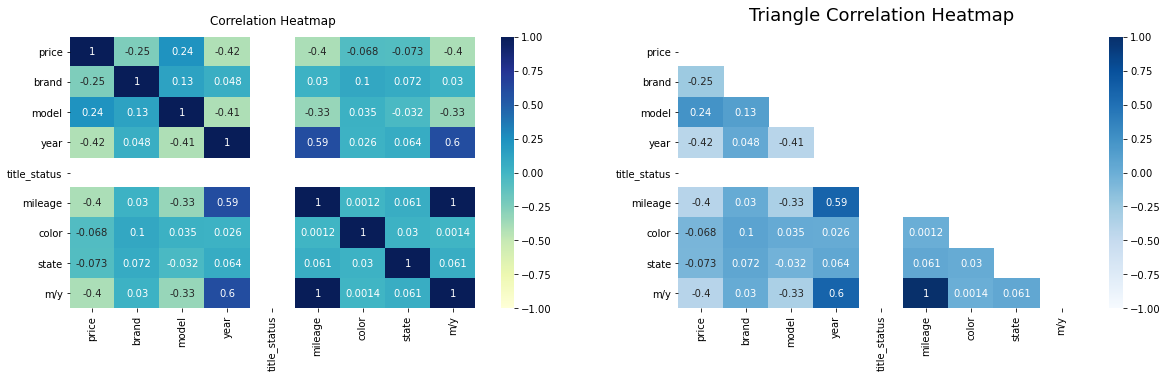

In [45]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))

#heatmap corrolation
import seaborn as sns
heatmap = sns.heatmap(data1.corr(), ax=axes[0] , vmin=-1, vmax=1, annot=True ,cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap' , fontdict={'fontsize':12}, pad=12);

# triangle corrolation
mask = np.triu(np.ones_like(data1.corr(), dtype=np.bool))
heatmap = sns.heatmap(data1.corr(),  vmin=-1, vmax=1, mask =mask , annot=True, cmap="Blues")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

#titile_statuse???????

-------------------------------------------------------------------------------------------------------------------------------------------

>### knn

In [48]:
X=data1.drop(['price','condition'] ,axis=1)
y=data1['price']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), random_state=500)
print(  X_train.shape , X_test.shape , y_train.shape , y_test.shape  )

(1874, 8) (625, 8) (1874,) (625,)


In [53]:
knn_reg = KNeighborsRegressor(n_neighbors=200)

In [54]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=200)

In [55]:
knn_reg.score(X_train, y_train)

0.24752367363380956

In [56]:
knn_reg.score(X_test, y_test)

0.299537725687298

>### linear model

In [47]:
from sklearn.linear_model import LinearRegression

In [57]:
X=data1.drop(['price','condition'] ,axis=1)
y=data1['price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), random_state=500)
print(  X_train.shape , X_test.shape , y_train.shape , y_test.shape  )

(1874, 8) (625, 8) (1874,) (625,)


In [60]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

In [61]:
l_reg.coef_

array([-3.05280777e+03,  8.45944132e+02, -1.26767094e+03,  2.27373675e-12,
       -1.18495229e+01, -6.04179529e+02, -6.94736723e+02,  2.37495142e+04])

In [62]:
l_reg.intercept_

34070.10599050956

In [63]:
l_reg.score(X_train, y_train)

0.269502283166986

In [64]:
l_reg.score(X_test, y_test)

0.3554528518452895

-------------------------------------------------------------------------------------------------------------------------------------------

>### Ridge

In [67]:
from sklearn.linear_model import Ridge
X=data1.drop(['price','condition'] ,axis=1)
y=data1['price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), random_state=500)
print(  X_train.shape , X_test.shape , y_train.shape , y_test.shape  )

(1874, 8) (625, 8) (1874,) (625,)


In [69]:
l_ridge = Ridge()
l_ridge.fit(X_train, y_train)

Ridge()

In [70]:
l_ridge.score(X_train, y_train)

0.26930670191893025

l_ridge.score(X_test, y_test)

In [86]:
l_ridge10 = Ridge(alpha=10)
l_ridge10.fit(X_train, y_train)
print(l_ridge10.score(X_train, y_train))
print(l_ridge10.score(X_test, y_test))

0.26453891788079176
0.3489407698554461


-------------------------------------------------------------------------------------------------------------------------------------------

>###  Gradiant boosting regressor

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
X=data1.drop(['price','condition'] ,axis=1)
y=data1['price']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), random_state=100)
print(  X_train.shape , X_test.shape , y_train.shape , y_test.shape  )


(1874, 8) (625, 8) (1874,) (625,)


In [151]:
gr_boost = GradientBoostingRegressor(  n_estimators=150,learning_rate=0.1  , max_depth=3)
gr_boost.fit(X_train, y_train)
print(gr_boost.score(X_train, y_train))
print(gr_boost.score(X_test, y_test))

0.5281860671656718
0.36034578643745585


In [156]:
gr_boost = GradientBoostingRegressor(  n_estimators=500,learning_rate=0.1  , max_depth=3 )
gr_boost.fit(X_train, y_train)
print(gr_boost.score(X_train, y_train))
print(gr_boost.score(X_test, y_test))

0.7130978622846833
0.30619242103845


In [166]:
print('Gradiant boosting regressor')
print(gr_boost.score(X_train, y_train))
print(gr_boost.score(X_test, y_test))
print('\n')
print('Ridge')
print(l_ridge10.score(X_train, y_train))
print(l_ridge10.score(X_test, y_test))
print('\n')
print('linearmodel')
print(l_reg.score(X_train, y_train))
print(l_reg.score(X_test, y_test))



Gradiant boosting regressor
0.7130978622846833
0.3091589623207962


Ridge
0.27359853611993445
0.3157040762051172


linearmodel
0.2787772524055744
0.3214583100946813
